# PENGENALAN

Nama  : PRADUTA FIRMAN ANUGRAH
Kelas : Full Time Data Science
Batch : 01
Tujuan Program

Pada program ini akan dilakukan uji hipotesis pada tabel, untuk mengecek apakah data tersebut terdistribusi secara normal, apakah ada kaitannya hubungan antara kolom satu dengan yang lain, apakah diambil secara random dan sebagainya yang diperlukan untuk hipotesis testing.

Isi notebook dibawah ini berupa:

Perkenalan
Import pustaka yang dibutuhkan
Data Loading
Data Cleaning
Eksplorasi Data
Measure of Central Tendency
Measures of Variance
Hyphothesis Testing
Pengambilan Kesimpulan

# Import Pustaka

In [28]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [11]:
df =pd.read_csv('ks-projects-201801.csv')

In [12]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


# Data Preprocessing

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 31.8+ MB


In [14]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# Data Cleaning

Identifikasi missing value

In [15]:
df.isnull().sum().sort_values(ascending = False)

usd pledged         3797
name                   4
ID                     0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged_real       0
usd_goal_real          0
dtype: int64

Drop missing value

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum().sort_values(ascending = False)

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Data telah bersin dari null dan N/A, data siap untuk digunakan

# Measure Central

In [18]:
col = ["goal","pledged","backers","usd pledged","usd_pledged_real","usd_goal_real"]

In [19]:
for i in col:
    print("Mean dari",i,":",df[i].mean())# mengambil nilai mean

Mean dari goal : 49522.988841087354
Mean dari pledged : 9750.538300832606
Mean dari backers : 106.68836632342742
Mean dari usd pledged : 7036.802252334279
Mean dari usd_pledged_real : 9120.898548951884
Mean dari usd_goal_real : 45863.02597164278


In [20]:
for i in col:
    print("Median dari",i,":",df[i].median())# mengambil nilai tengah/median

Median dari goal : 5500.0
Median dari pledged : 620.0
Median dari backers : 12.0
Median dari usd pledged : 394.765
Median dari usd_pledged_real : 624.495
Median dari usd_goal_real : 5500.0


In [22]:
for i in col:
    print("Modus dari",i,":",df[i].mode())# mengambil nilai yang sering muncul

Modus dari goal : 0    5000.0
dtype: float64
Modus dari pledged : 0    0.0
dtype: float64
Modus dari backers : 0    0
dtype: int64
Modus dari usd pledged : 0    0.0
dtype: float64
Modus dari usd_pledged_real : 0    0.0
dtype: float64
Modus dari usd_goal_real : 0    5000.0
dtype: float64


# Measure of Variance

In [23]:
for i in col:
    print(i ,"range:",(df[i].max()-df[i].min()))# melihat nilai range

goal range: 99999999.99
pledged range: 20338986.27
backers range: 219382
usd pledged range: 20338986.27
usd_pledged_real range: 20338986.27
usd_goal_real range: 166361390.70000002


In [24]:
for i in col:
    print("Nilai variance dari",i,":",df[i].var())# mengambil nilai variance

Nilai variance dari goal : 1414581018455.966
Nilai variance dari pledged : 9218100120.711504
Nilai variance dari backers : 831215.3505826988
Nilai variance dari usd pledged : 6184275027.015127
Nilai variance dari usd_pledged_real : 8339286590.888803
Nilai variance dari usd_goal_real : 1342741824113.8914


In [25]:
for i in col:
    print("Nilai std dari",i,":",df[i].std())

Nilai std dari goal : 1189361.6012197325
Nilai std dari pledged : 96010.93750563789
Nilai std dari backers : 911.7101242076337
Nilai std dari usd pledged : 78640.16166702054
Nilai std dari usd_pledged_real : 91319.69443054879
Nilai std dari usd_goal_real : 1158767.3727344463


# Confidence Intervals

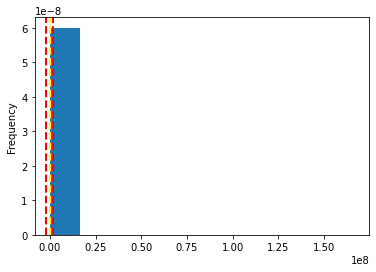

90% Confidence Interval:  (-1860139.6898636406, 1951865.7418069253)


In [26]:
samples = df["usd_goal_real"]
m = samples.mean()
sd = samples.std()
ci = stats.norm.interval(0.90,m,sd)

samples.plot.hist(samples,bins= 10,density=True)
pl.axvline(m, color= "yellow",linestyle= "dashed",linewidth= 2)
pl.axvline(ci[0], color= "red",linestyle= "dashed",linewidth= 2)
pl.axvline(ci[1], color= "red",linestyle= "dashed",linewidth= 2)
pl.show()
print("90% Confidence Interval: ",ci)

# Hypothesis Testing

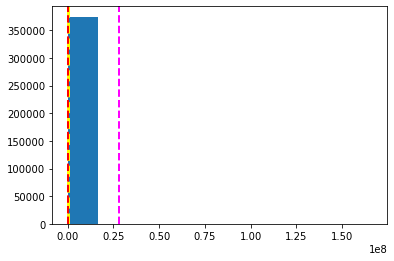

In [27]:
sample = df["usd_goal_real"]
t,p = stats.ttest_1samp(sample,0)
ci = stats.norm.interval(0.90,0,1.15)
pl.hist(sample)
pl.axvline(sample.mean(), color= "yellow",linestyle= "dashed",linewidth= 3)
pl.axvline(ci[0], color= "red",linestyle= "dashed",linewidth= 2)
pl.axvline(sample.mean()+t*sample.std(), color= "magenta",linestyle= "dashed",linewidth= 2)
pl.show()

In [29]:
x = pd.crosstab(df["main_category"], df["currency"])
chisq, pvalue, df, expected = stats.chi2_contingency(x)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
x

Observed chi2: 15413.76
P-value: 0.0000


currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
main_category,,,,,,,,,,,,,,
Art,425,1067,48,89,1083,2667,34,2,160,34,91,112,30,22310
Comics,188,521,6,15,204,867,8,0,35,17,16,25,7,8910
Crafts,183,426,22,33,391,904,12,0,63,17,43,37,30,6648
Dance,32,94,4,3,78,280,1,0,24,7,8,7,1,3228
Design,929,1500,132,175,2052,2706,236,8,108,62,157,172,140,21689
Fashion,717,1060,65,77,1434,2372,45,8,76,41,101,128,104,16584
Film & Video,940,1703,55,112,1373,5782,10,1,317,75,189,202,16,51921
Food,477,1047,50,60,989,1649,10,0,102,48,100,103,23,19941
Games,961,1884,65,105,2727,4011,76,10,148,85,183,275,59,24636


P-Value = 0,000